<a href="https://colab.research.google.com/github/pseudovicky/100DaysOfJavaScript/blob/main/R_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
! pip3 install ggplot
! pip3 install dplyr
! pip3 install lubridate
! pip3 install fbprophet
! pip3 install plotly

ERROR: Error in parse(text = input): <text>:1:8: unexpected symbol
1: ! pip3 install
           ^


In [6]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

In [7]:
# Load the dataset
sales_data <- read.csv('sales_data.csv')
# Convert 'Month' and 'Year' columns to a single date format without lubridate
sales_data$Date <- as.Date(paste(sales_data$Year, match(sales_data$Month, month.name),
"1", sep = "-"))
sales_data <- sales_data[order(sales_data$Date),]
sales_data$Month <- factor(sales_data$Month, levels = month.name) # Order months

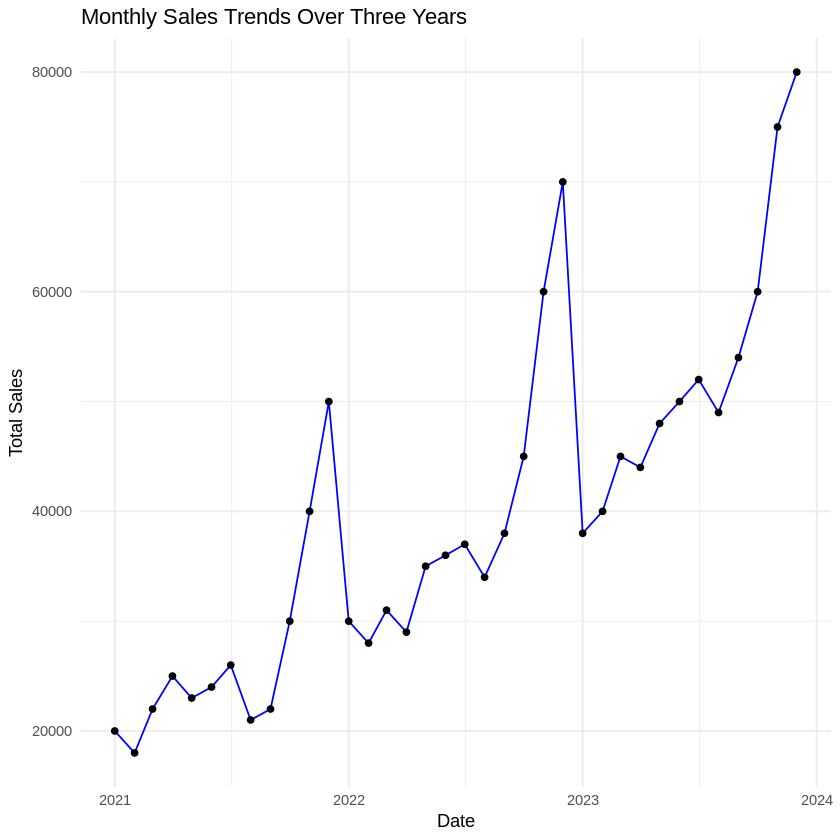

In [8]:
# 1. Line Plot for Monthly Sales Trends Over Three Years
ggplot(sales_data, aes(x = Date, y = Total_Sales, group = 1)) +
geom_line(color = "blue") +
geom_point() +
labs(title = "Monthly Sales Trends Over Three Years", x = "Date", y = "Total Sales") +
theme_minimal()

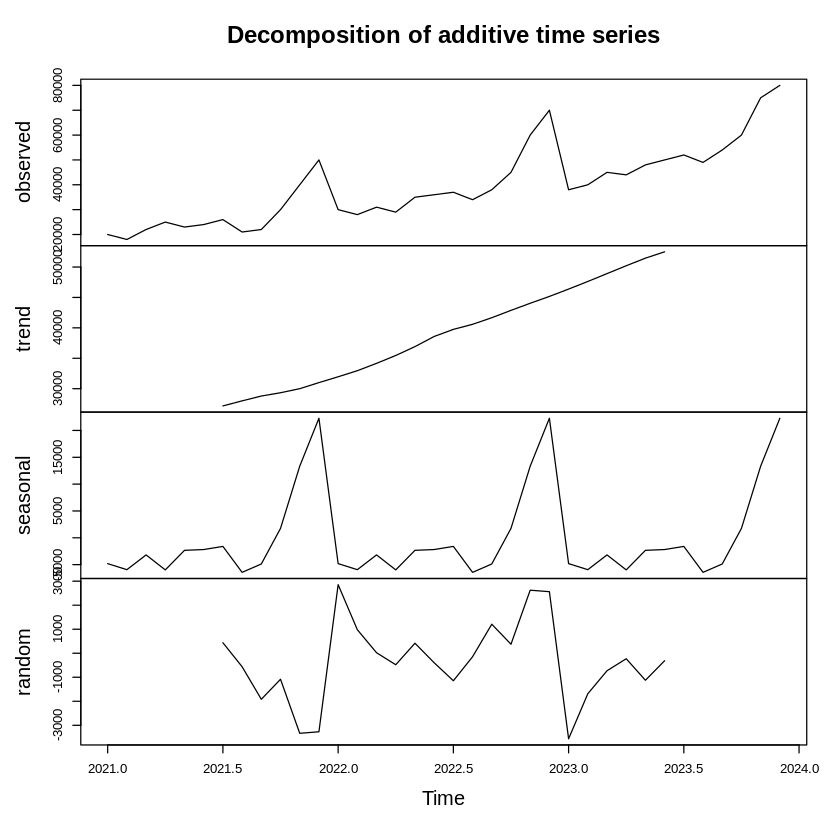

In [9]:
# 2. Seasonal Decomposition
# Ensure data is in a time series format
sales_ts <- ts(sales_data$Total_Sales, start = c(2021, 1), frequency = 12)
decomposition <- decompose(sales_ts)
plot(decomposition)

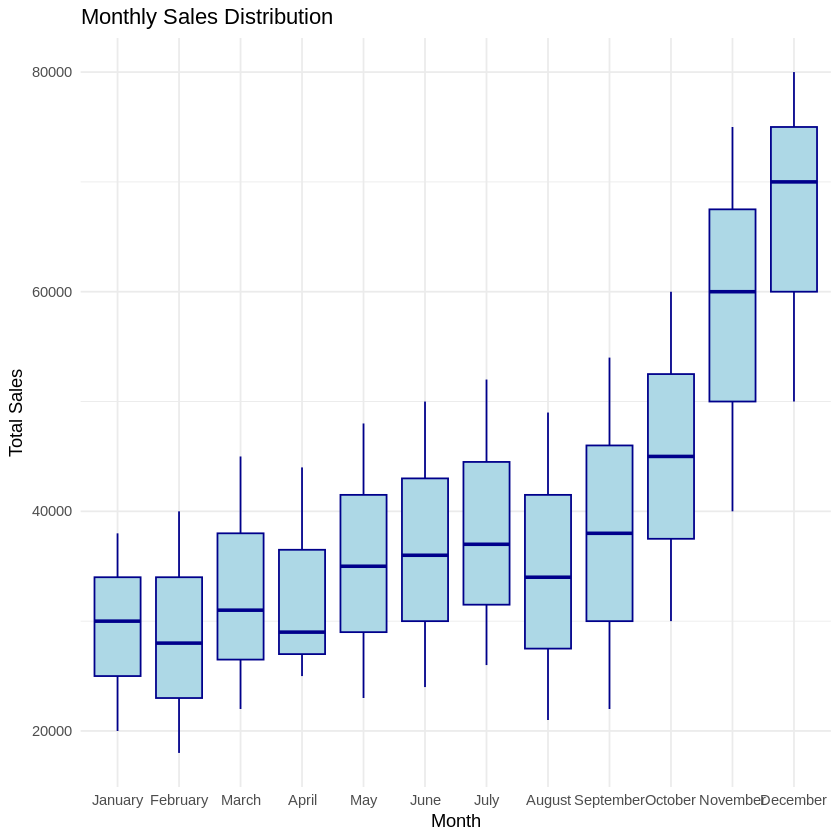

In [10]:
# 3. Box Plot for Monthly Sales Distribution
ggplot(sales_data, aes(x = Month, y = Total_Sales)) +
geom_boxplot(fill = "lightblue", color = "darkblue") +
labs(title = "Monthly Sales Distribution", x = "Month", y = "Total Sales") +
theme_minimal()

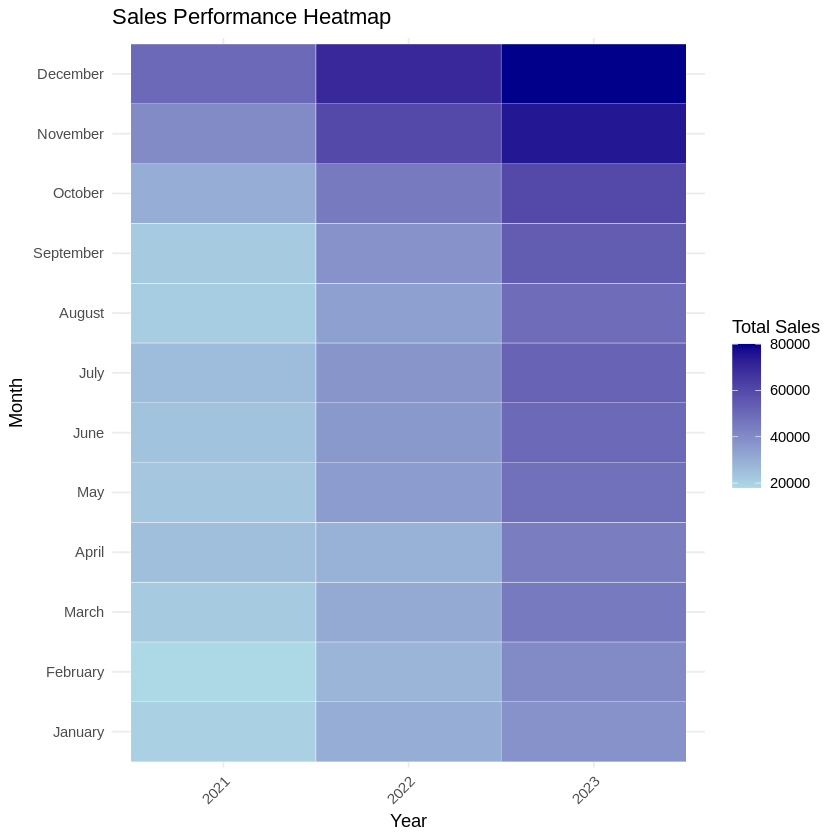

In [11]:
# 4. Heatmap of Monthly Sales Performance Over the Years
ggplot(sales_data, aes(x = factor(Year), y = Month, fill = Total_Sales)) +
geom_tile(color = "white") +
scale_fill_gradient(low = "lightblue", high = "darkblue") +
labs(title = "Sales Performance Heatmap", x = "Year", y = "Month", fill = "Total Sales") +
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [12]:
# Load libraries
library(ggplot2)
library(dplyr)
# Load the data from the given URL
url <- "customer_segmentation.csv"
data <- read.csv(url)
# Inspect the data
head(data)

,Customer_Segment,Age_Group,Total_Spending
,<chr>,<chr>,<int>
1,Segment A,18-25,2500
2,Segment B,26-35,3000
3,Segment C,36-45,4000
4,Segment D,46-55,2000
5,Segment E,56-65,1500
6,Segment F,66+,1000


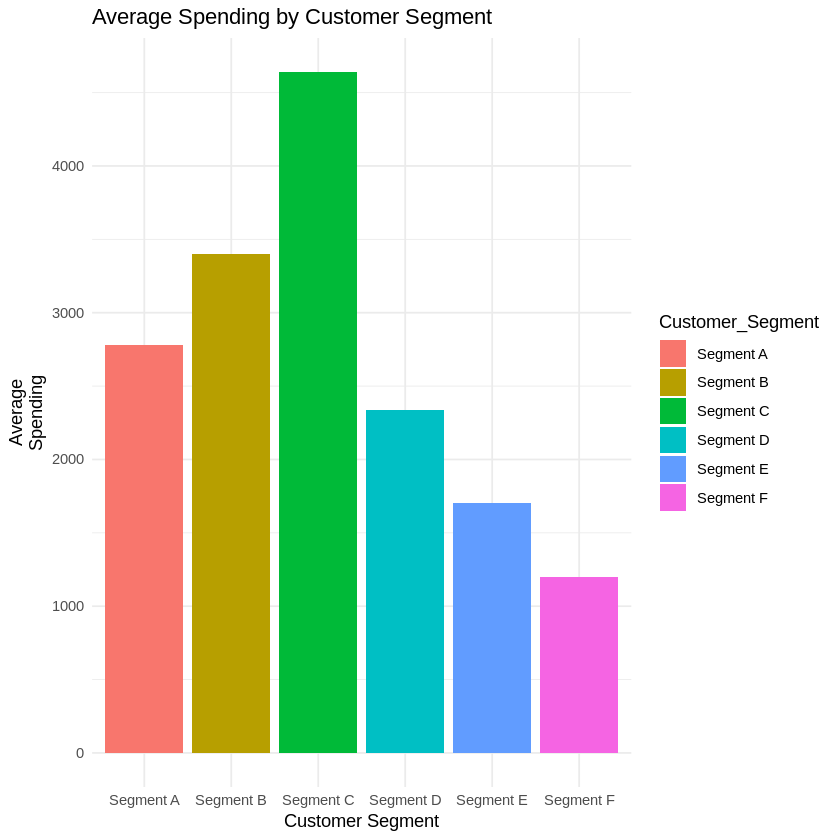

In [13]:
# 1. Bar Plot: Average spending by Customer Segment
avg_spending <- data %>%
group_by(Customer_Segment) %>%
summarise(Average_Spending = mean(Total_Spending))
ggplot(avg_spending, aes(x = Customer_Segment, y = Average_Spending, fill =
Customer_Segment)) +
geom_bar(stat = "identity") +
theme_minimal() +
labs(title = "Average Spending by Customer Segment", x = "Customer Segment", y = "Average
Spending")

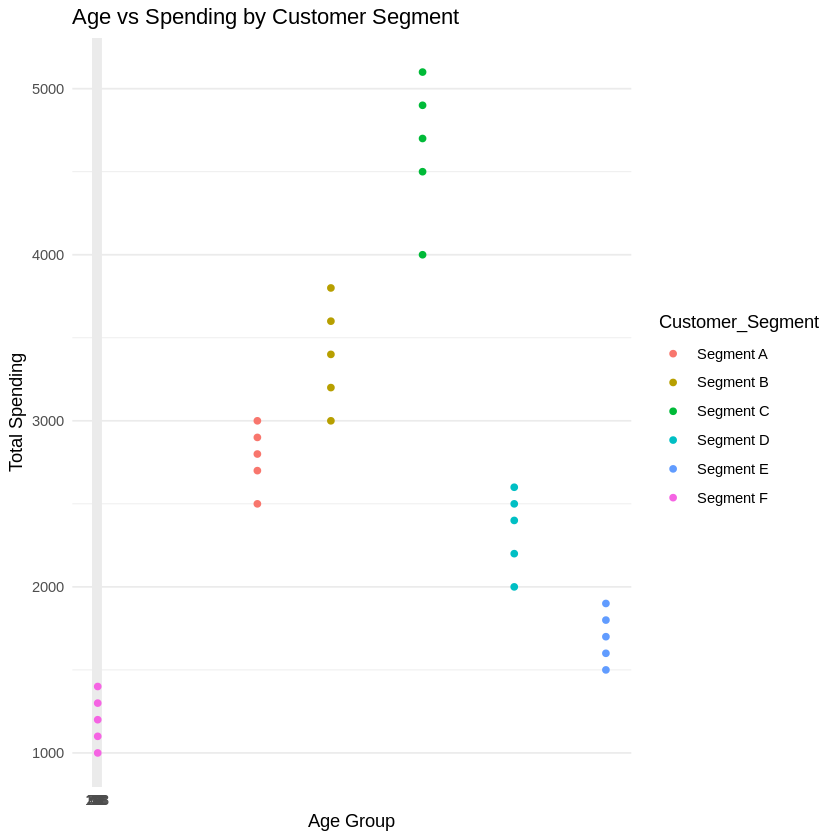

In [14]:
# 2. Scatter Plot: Age vs Spending by Customer Segment
# Preprocess the age group to extract numeric values
data$Age_Group_Num <- as.numeric(gsub("[^0-9]", "", data$Age_Group))
ggplot(data, aes(x = Age_Group_Num, y = Total_Spending, color = Customer_Segment)) +
geom_point() +
theme_minimal() +
labs(title = "Age vs Spending by Customer Segment", x = "Age Group", y = "Total Spending") +
scale_x_continuous(breaks = seq(18, 100, by = 10))

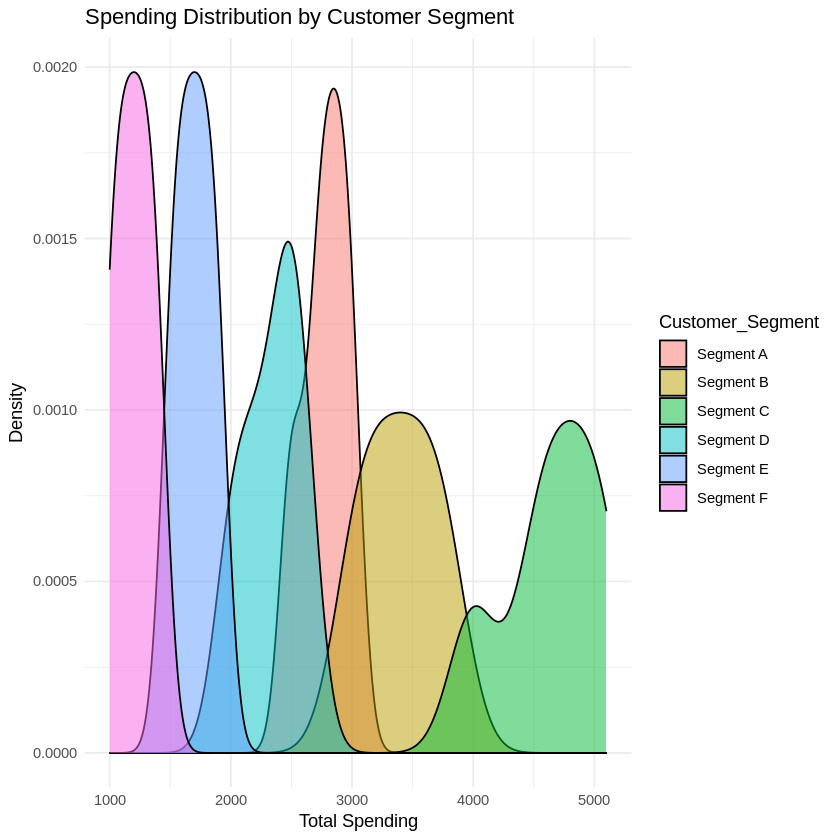

In [15]:
# 3. Density Plot: Distribution of Spending by Customer Segment
ggplot(data, aes(x = Total_Spending, fill = Customer_Segment)) +
geom_density(alpha = 0.5) +
theme_minimal() +
labs(title = "Spending Distribution by Customer Segment", x = "Total Spending", y = "Density")

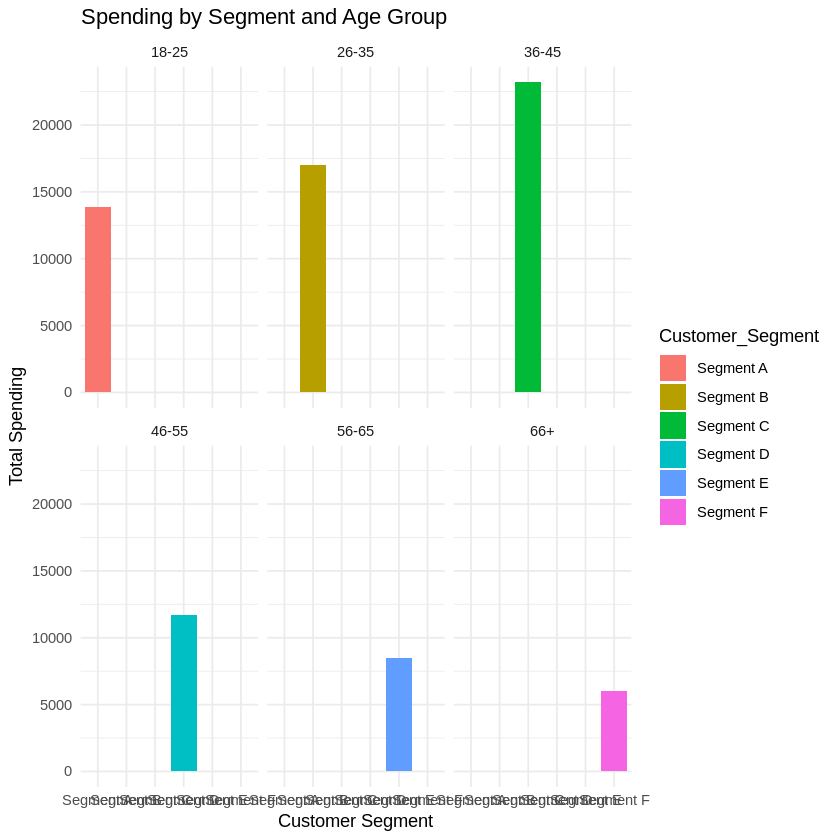

In [16]:
# 4. Faceted Plot: Spending by Segment and Age Group
ggplot(data, aes(x = Customer_Segment, y = Total_Spending, fill = Customer_Segment)) +geom_bar(stat = "identity") +
facet_wrap(~ Age_Group) +
theme_minimal() +
labs(title = "Spending by Segment and Age Group", x = "Customer Segment", y = "Total Spending")

In [17]:
# Necessary libraries
library(ggplot2)
library(dplyr)
# Load the dataset
data <- read.csv("data.csv.csv")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


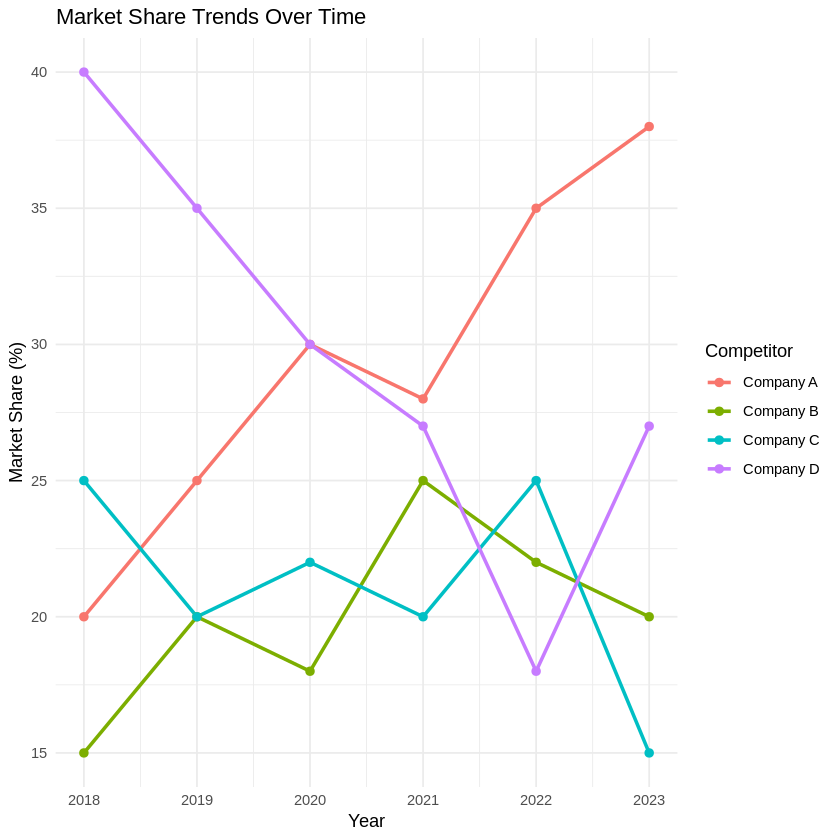

In [18]:
# Visualization 1: Line Plot - Market Share Trends Over Time for Each Competitor
ggplot(data, aes(x = year, y = market_share, color = competitor, group = competitor)) +
geom_line(size = 1) +
geom_point(size = 2) +
labs(title = "Market Share Trends Over Time",
x = "Year",
y = "Market Share (%)",
color = "Competitor") +
theme_minimal()

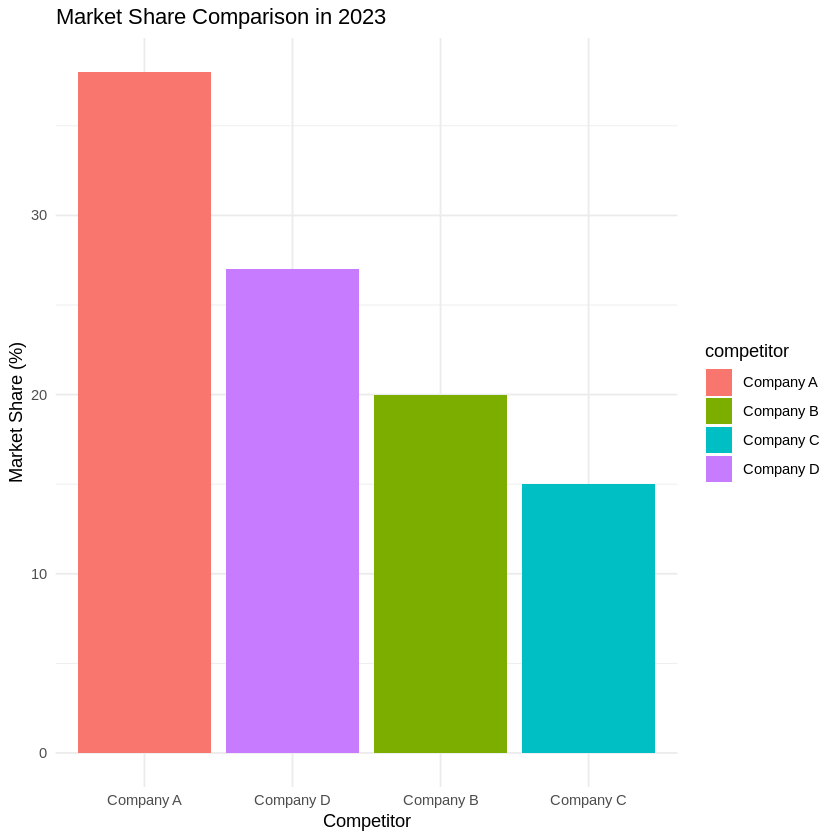

In [19]:
# Visualization 2: Bar Plot - Market Share Comparison Among Top Competitors
latest_year <- max(data$year)
top_competitors <- data %>% filter(year == latest_year)
ggplot(top_competitors, aes(x = reorder(competitor, -market_share), y = market_share, fill =
competitor)) +
geom_bar(stat = "identity") +
labs(title = paste("Market Share Comparison in", latest_year),
x = "Competitor",
y = "Market Share (%)") +
theme_minimal()

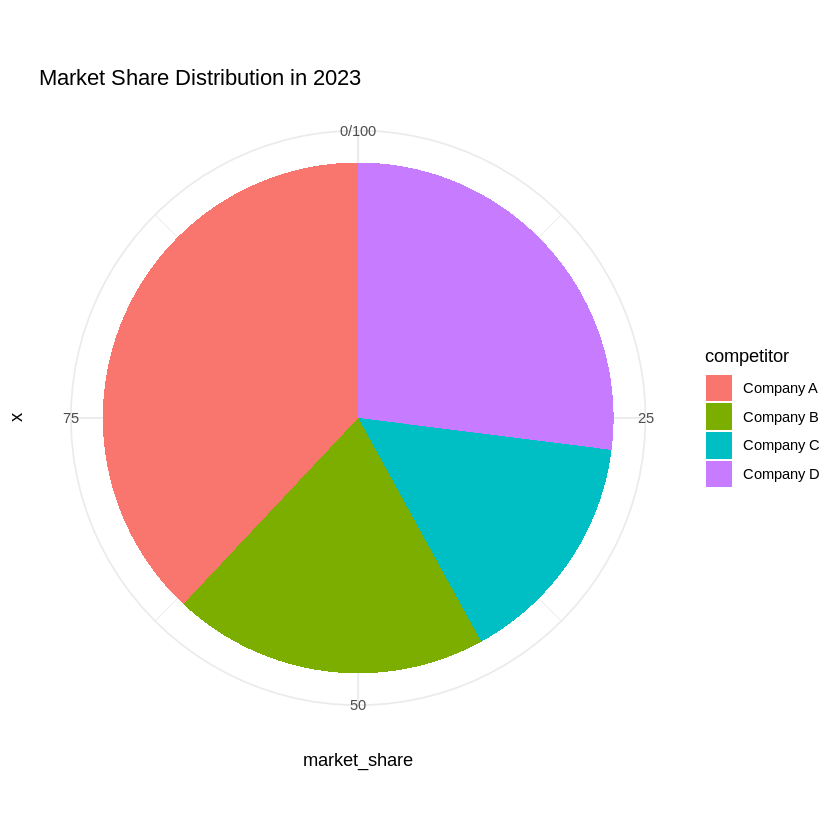

In [20]:
# Visualization 3: Pie Chart - Current Market Share Distribution
ggplot(top_competitors, aes(x = "", y = market_share, fill = competitor)) +
geom_bar(stat = "identity", width = 1) +
coord_polar("y") +
labs(title = paste("Market Share Distribution in", latest_year)) +
theme_minimal()

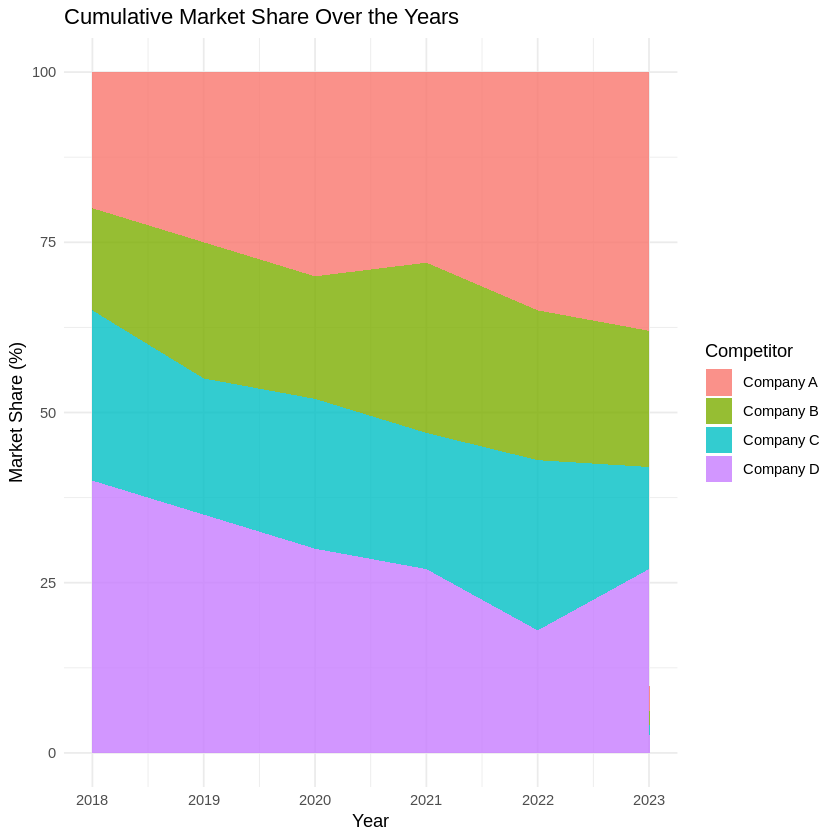

In [21]:
# Visualization 4: Area Plot - Cumulative Market Share Over the Years
ggplot(data, aes(x = year, y = market_share, fill = competitor)) +
geom_area(position = "stack", alpha = 0.8) +
labs(title = "Cumulative Market Share Over the Years",
x = "Year",
y = "Market Share (%)",fill = "Competitor") +
theme_minimal()

'data.frame':	10 obs. of  6 variables:
 $ product_id     : int  1 2 3 4 5 6 7 8 9 10
 $ category       : chr  "Electronics" "Clothing" "Groceries" "Furniture" ...
 $ sales_volume   : int  150 200 350 80 220 130 400 60 180 250
 $ inventory_cost : num  75.5 45 20 150 90 40 25 200 70 30
 $ inventory_level: int  300 500 600 400 350 200 800 300 600 400
 $ turnover_rate  : num  0.5 0.4 0.58 0.2 0.63 0.65 0.5 0.2 0.3 0.62


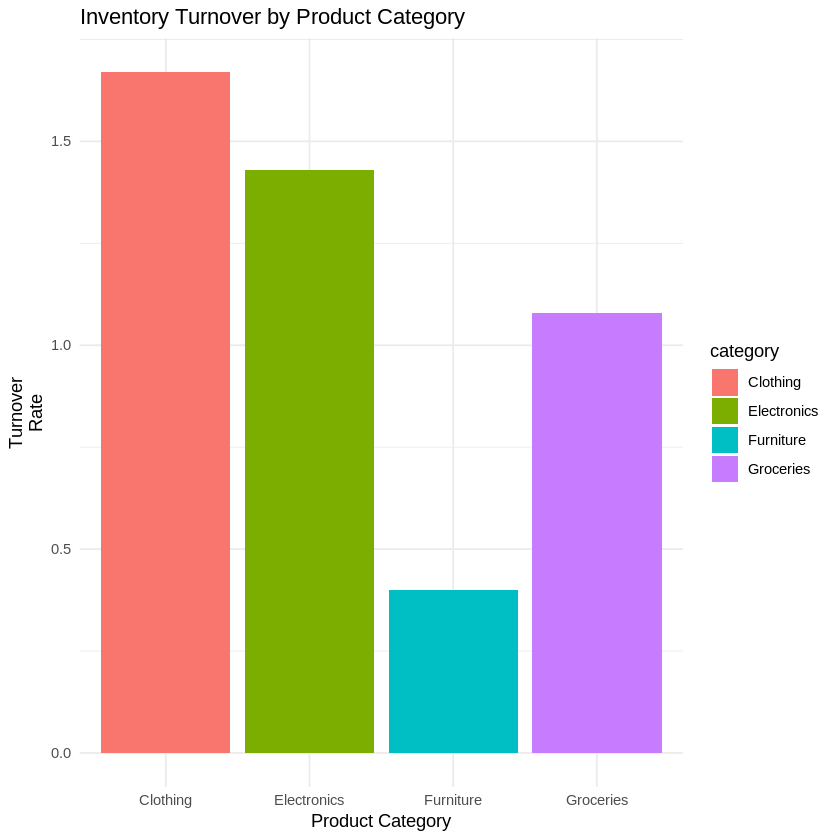

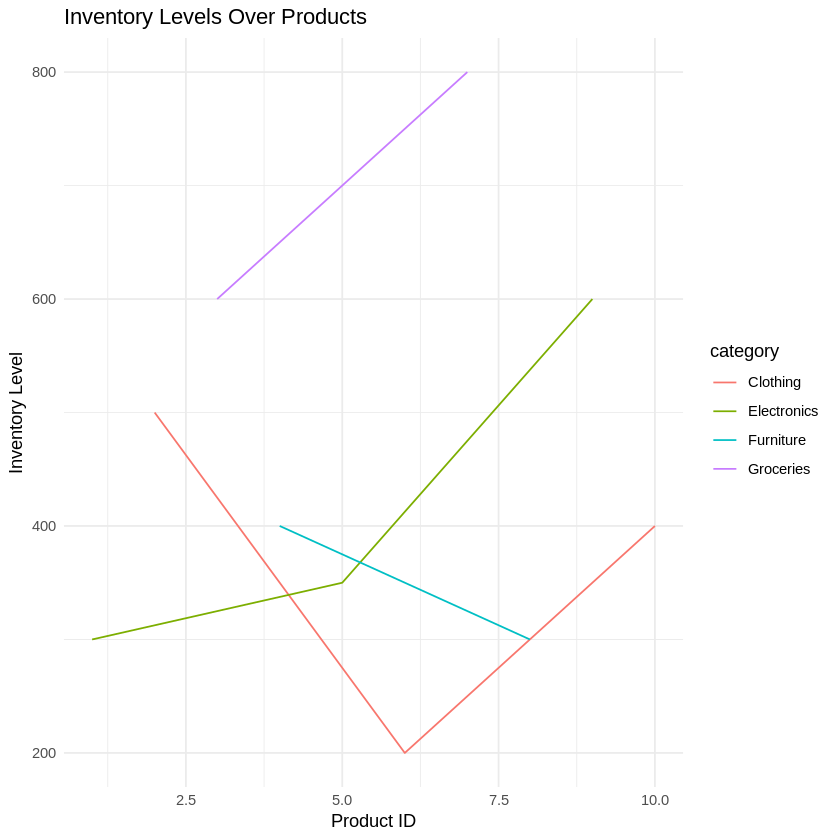

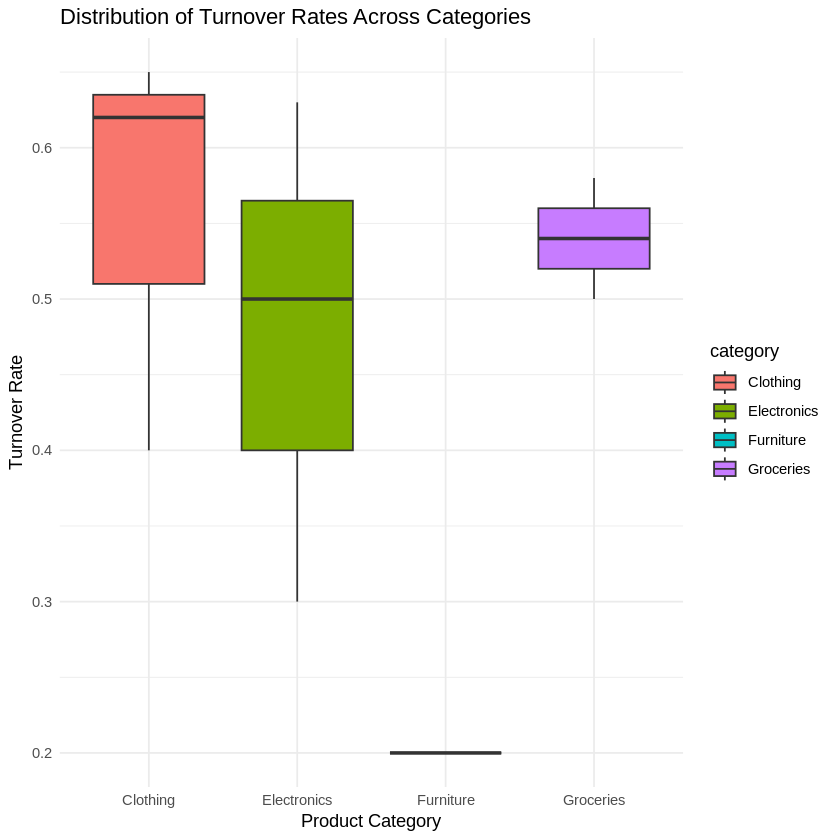

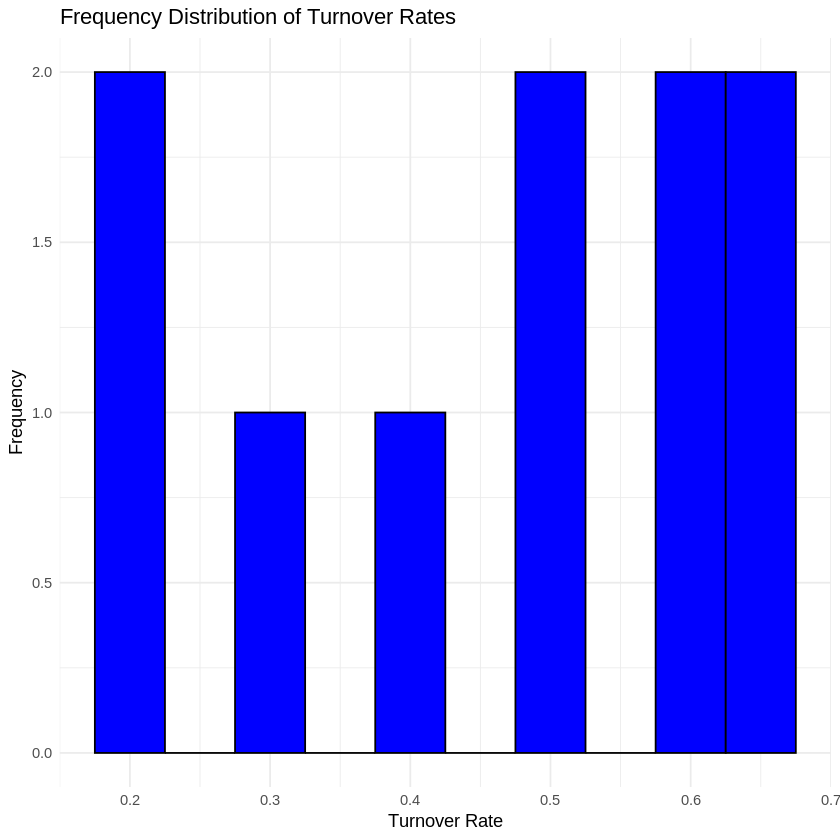

In [22]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
# Load the dataset
dataset_url <- "product.csv"
inventory_data <- read.csv(dataset_url)
# Check data structure
str(inventory_data)
# Visualization 1: Bar Plot of Inventory Turnover by Product Category
ggplot(inventory_data, aes(x = category, y = turnover_rate, fill = category)) +
geom_bar(stat = "identity") +
labs(title = "Inventory Turnover by Product Category", x = "Product Category", y = "Turnover
Rate") +
theme_minimal()
# Visualization 2: Line Plot of Inventory Levels Over Time
# Assuming data includes a "time" or "date" column for trends over time
ggplot(inventory_data, aes(x = product_id, y = inventory_level, color = category, group =
category)) +
geom_line() +
labs(title = "Inventory Levels Over Products", x = "Product ID", y = "Inventory Level") +
theme_minimal()
# Visualization 3: Box Plot of Turnover Rates Across Categories
ggplot(inventory_data, aes(x = category, y = turnover_rate, fill = category)) +
geom_boxplot() +
labs(title = "Distribution of Turnover Rates Across Categories", x = "Product Category", y =
"Turnover Rate") +
theme_minimal()
# Visualization 4: Histogram of Turnover Rates
ggplot(inventory_data, aes(x = turnover_rate)) +
geom_histogram(binwidth = 0.05, fill = "blue", color = "black") +
labs(title = "Frequency Distribution of Turnover Rates", x = "Turnover Rate", y = "Frequency") +
theme_minimal()